# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [7]:
#function
df_raw.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a wider range of possible scores than GPA points

#### Question 4. Drop data points with missing data


In [22]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [31]:
df_raw.isnull().sum().sum()

5

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

#### Question 6. Create box plots for GRE and GPA

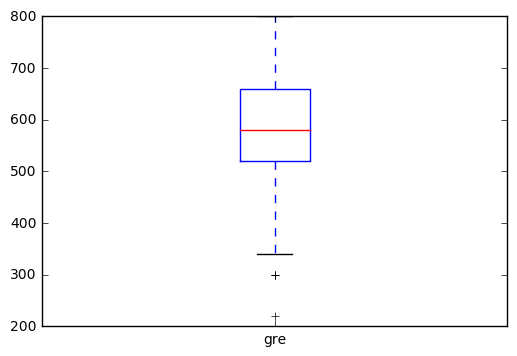

In [32]:
#boxplot 1
df_raw['gre'].plot(kind='box')

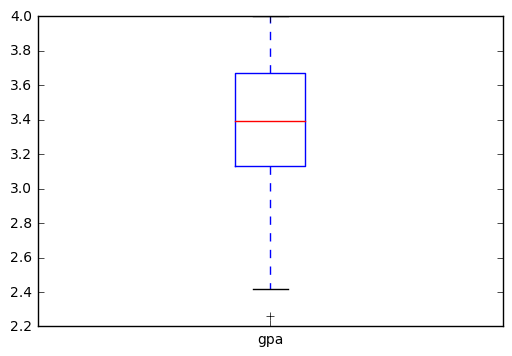

In [34]:
#boxplot 2 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do these plots show?

Answer: These box plots show the maximum and minimum values, median, and quartiles of GRE & GPA for the sample

#### Question 8. Describe each distribution 

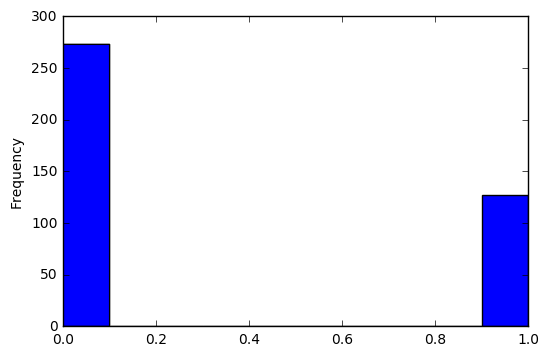

In [35]:
# plot the distribution of each variable 

df_raw['admit'].plot(kind='hist')

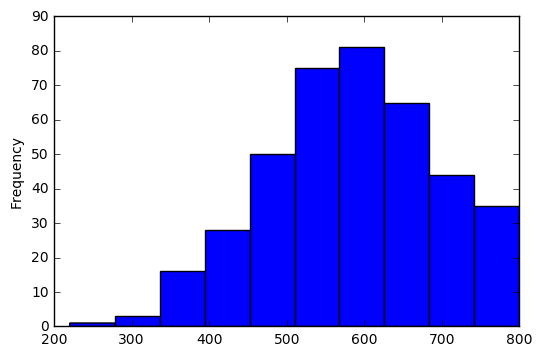

In [36]:
df_raw['gre'].plot(kind='hist')


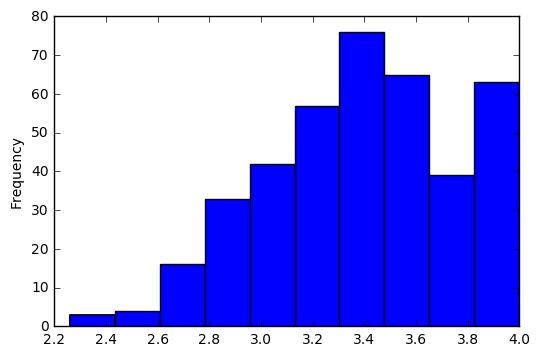

In [37]:
df_raw['gpa'].plot(kind='hist')


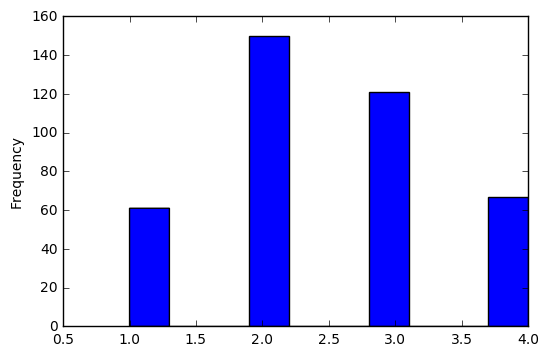

In [38]:
df_raw['prestige'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Not really

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, by using logistic regression

#### Question 11. Which of our variables are potentially colinear? 

In [40]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GRE & GPA might have some colinearity

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Check if Prestige is linearly correlated with Admission. Run the regression, check r-squared & p-value.

#### Question 14. What is your hypothesis? 

Answer: Prestige has a small impact on Admission

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data